### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [54]:
data = pd.read_csv('data/coupons.csv')

In [55]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

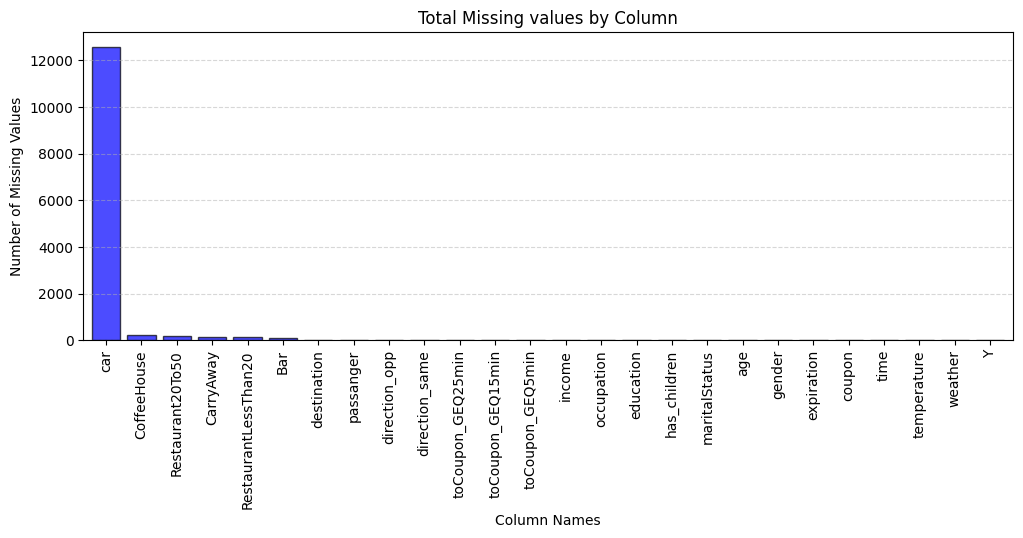

In [56]:
### ANSWER: Missing Values in "Car", "CoffeHouse", "Restaurant20To50", "RestaurantLessThan20", "Bar", "CarryAway

# Calculating and plotting the missing values in each column
data.isnull().sum().sort_values(ascending=False).plot(kind="bar", figsize=(12, 4), color="blue", width=0.8, alpha=0.7, edgecolor="black")
plt.title("Total Missing values by Column")
plt.xlabel("Column Names")
plt.ylabel("Number of Missing Values")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [57]:
#   1.  No point in deleting the missing values in Car column because its not helpful to know the category of the car for the Coupon acceptance decision. 
#   2.  I will keep the missing data as it is because for all missing data in Bar, CoffeHouse, Restaurant20To50, CarryAway and RestaurantLessThan20, there
#       are coupons accepted values (Y=1) and i do not want any Y=1 should be taken off from the table
#   3.  And there are are only 13 records where there are missing values in above mentioned 5 columns (except "Car") and Y=0 (39 records have Y=1)...there is no point 
#       in deleting any part of this data too because the other colums for this data (education, Income, age, gender etc..) has values. Its a useful data for 
#       machine learning model
#   4.  In any case if i had to delete the missing data, i would use the following code below:

# data.dropna(subset=['Bar', 'CoffeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20'], inplace=True)

4. What proportion of the total observations chose to accept the coupon?



In [58]:
# FINDING: Proportion of Observations that accepted the Coupon is 56.8% 

coupon_accepted_proportion = round(data.query("Y == 1").shape[0] /data.shape[0] * 100, 1)
"Proportion of Observation that accepted the Coupon = " + str(coupon_accepted_proportion) + "%"

'Proportion of Observation that accepted the Coupon = 56.8%'

5. Use a bar plot to visualize the `coupon` column.

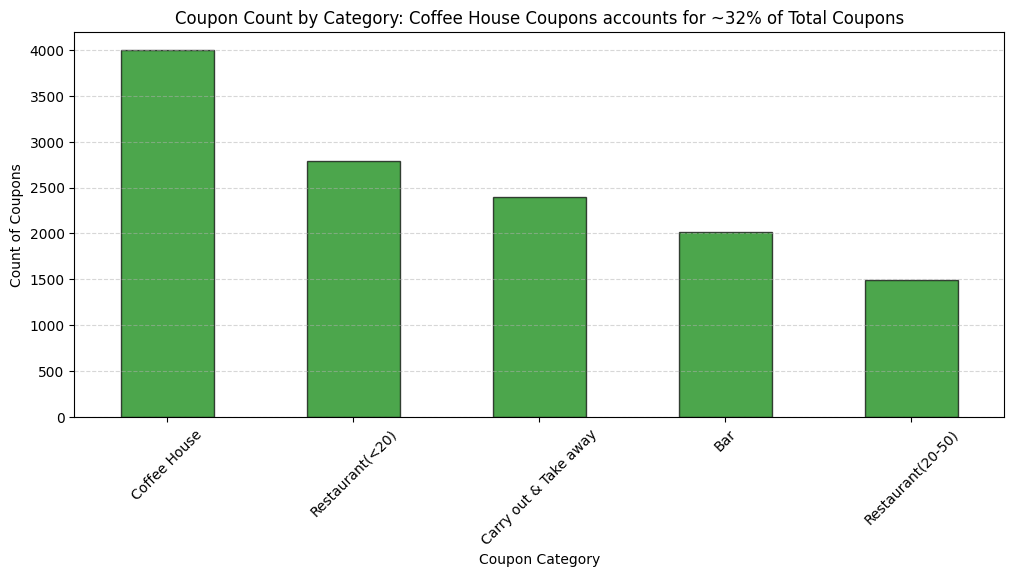

In [59]:
# FINDINGS: Coffee House Coupons accounts for ~32% of Total Coupons

# Plotting the BarPlot for the "Coupon" Columns

data["coupon"].value_counts().plot(kind="bar", figsize=(12, 5), color="green", alpha=0.7, edgecolor="black")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.title("Coupon Count by Category: Coffee House Coupons accounts for ~32% of Total Coupons")
plt.xlabel("Coupon Category")
plt.ylabel("Count of Coupons")
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

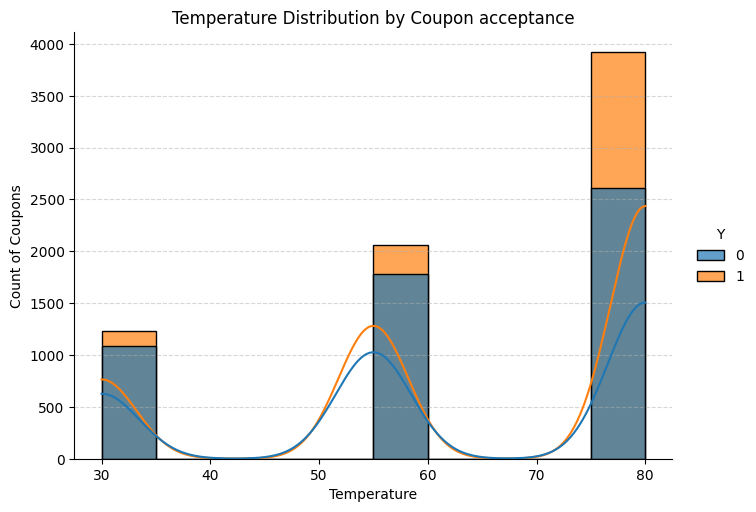

(count    12684.000000
 mean        63.301798
 std         19.154486
 min         30.000000
 25%         55.000000
 50%         80.000000
 75%         80.000000
 max         80.000000
 Name: temperature, dtype: float64,
 count    7210.000000
 mean       64.323856
 std        18.959363
 min        30.000000
 25%        55.000000
 50%        80.000000
 75%        80.000000
 max        80.000000
 Name: temperature, dtype: float64,
 count    5474.000000
 mean       61.955608
 std        19.327919
 min        30.000000
 25%        55.000000
 50%        55.000000
 75%        80.000000
 max        80.000000
 Name: temperature, dtype: float64)

In [60]:
# CONCLUSION : Descriptive Statistics of temperature Column using describe() method

#   1.  The overall temperature data is a normally distributed data skewed to the LEFT with Mean as 63.3 and Median as 80
#   2.  Temperature data for coupons accepted (Y=1) is also skewed to the LEFT with Mean as 64.3 and Median as 80
#   3.  Temperature data for coupons not accepted (Y=0) is skewed to the RIGHT with Mean as 61.9 and Median as 55
#   4.  Median doesnt show in the boxplot, as it either coincides with the Q1 or Q3 value
#   5.  The IQR for the overall temperature data is 25.0. There are no outliers in the overall temperature data


# Plotting the Histogram of temperature column with hue as "Y"

sns.displot(data, x="temperature", kde=True, hue="Y", height=5, aspect=1.4, color="blue", alpha=0.7, bins=10)
plt.title("Temperature Distribution by Coupon acceptance")
plt.xlabel("Temperature")
plt.ylabel("Count of Coupons")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
data["temperature"].describe(), data.query('Y == 1')["temperature"].describe(), data.query('Y == 0')["temperature"].describe()


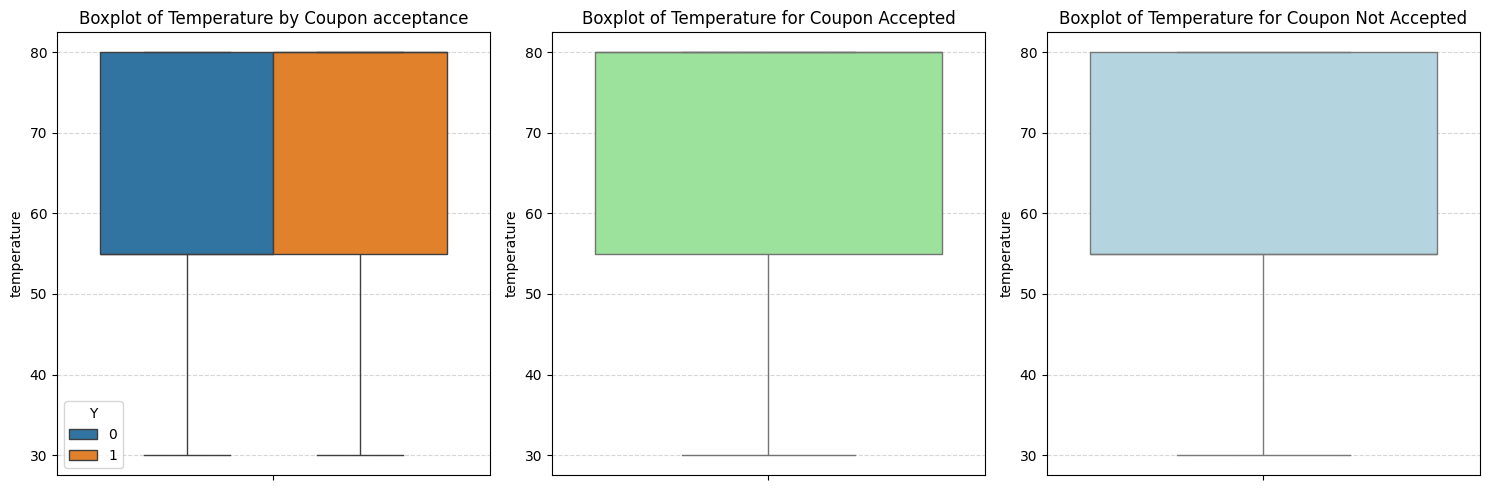

In [61]:
# Box Plot for the Temperature column for the Describe Statistics

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=data, y="temperature", ax=axes[0], hue="Y")
axes[0].set_title("Boxplot of Temperature by Coupon acceptance")
axes[0].grid(axis="y", linestyle="--", alpha=0.5)

sns.boxplot(data=data.query('Y==1'), y="temperature", ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot of Temperature for Coupon Accepted")
axes[1].grid(axis="y", linestyle="--", alpha=0.5)

sns.boxplot(data=data.query('Y==0'), y="temperature", ax=axes[2], color="lightblue")
axes[2].set_title("Boxplot of Temperature for Coupon Not Accepted")
axes[2].grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

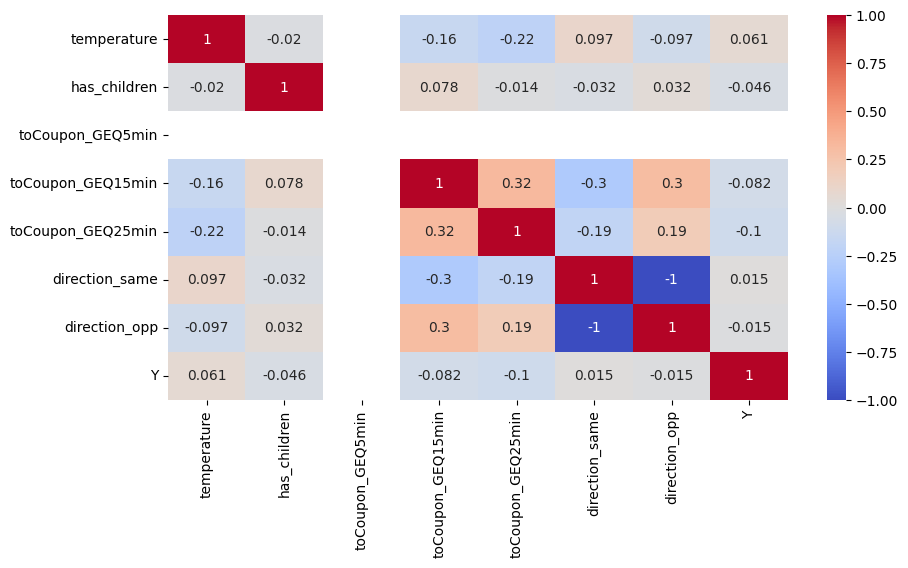

In [62]:
# FINDINGS: 
#   1. Positive correlation between "Direction_opp to toCoupon_GEQ25 and toCoupon_GEQ15" AND "toCoupon_GEQ25 and toCoupon_GEQ15" 
#   2. Negative correlation between "Response (Y) and toCoupon_GEQ25" AND "Response (Y) and Expiration"

plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show

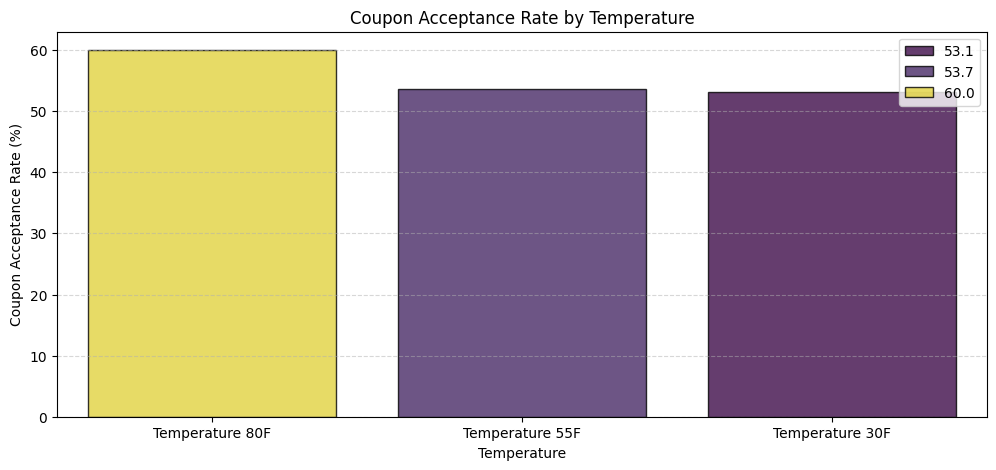

('Coupon Acceptance rate at 80F = 60.0%',
 'Coupon Acceptance rate at 55F = 53.7%',
 'Coupon Acceptance rate at 30F = 53.1%')

In [63]:
# FINDINGS: Calculating Coupon Acceptance Rate by Temperature
#  1.  The coupon acceptance rate is highest at 80F (60%) and lowest at 30F (53%)
acceptance_rate_80 = round(data.query('temperature == 80 and Y == 1').shape[0] / data.query('temperature == 80').shape[0] * 100,1)
acceptance_rate_55 = round(data.query('temperature == 55 and Y == 1').shape[0] / data.query('temperature == 55').shape[0] * 100,1)
acceptance_rate_30 = round(data.query('temperature == 30 and Y == 1').shape[0] / data.query('temperature == 30').shape[0] * 100,1)

# Plotting the Acceptance Rate by Temperature
plt.figure(figsize=(12, 5))
sns.barplot(x=["Temperature 80F", "Temperature 55F", "Temperature 30F"], y=[acceptance_rate_80, acceptance_rate_55, acceptance_rate_30], hue=[acceptance_rate_80, acceptance_rate_55, acceptance_rate_30], palette="viridis", alpha=0.8, edgecolor="black")
plt.title("Coupon Acceptance Rate by Temperature")
plt.xlabel("Temperature")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

"Coupon Acceptance rate at 80F = " + str(acceptance_rate_80) + "%", "Coupon Acceptance rate at 55F = " + str(acceptance_rate_55) + "%", "Coupon Acceptance rate at 30F = " + str(acceptance_rate_30) + "%"

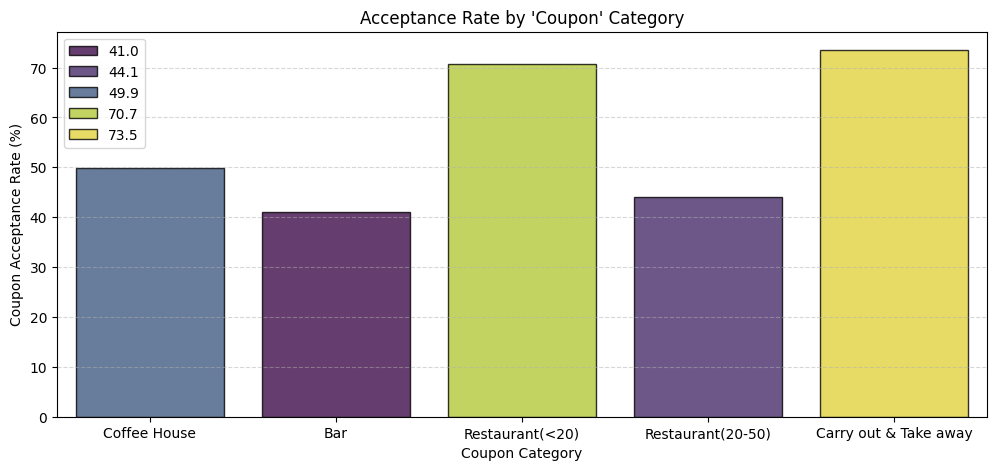

('Coupon Acceptance rate for Coffee House = 49.9%',
 'Coupon Acceptance rate for Bar = 41.0%',
 'Coupon Acceptance rate for Restaurant(<20) = 70.7%',
 'Coupon Acceptance rate for Restaurant(20-50) = 44.1%',
 'Coupon Acceptance rate for Carry out & Take away = 73.5%')

In [64]:
# FINDINGS: Bar coupons have the lowest acceptance rate across all the Coupon Categories
#   1.  The acceptance rate for Bar: 41%, Coffee House: 50%, Restaurants(<20): 70.7% , Restaurants(20-50): 44%, Carry Out & Take Away: 73.5%

# Calculating Acceptance Rate by "Coupon Category"
acceptance_rate_coffee= round(data.query('coupon == "Coffee House" and Y == 1').shape[0] / data.query('coupon == "Coffee House"').shape[0] * 100,1)
acceptance_rate_bar = round(data.query('coupon == "Bar" and Y == 1').shape[0] / data.query('coupon == "Bar"').shape[0] * 100,1)
acceptance_rate_restaurant_20 = round(data.query('coupon == "Restaurant(<20)" and Y == 1').shape[0] / data.query('coupon == "Restaurant(<20)"').shape[0] * 100,1)
acceptance_rate_restaurant_50 = round(data.query('coupon == "Restaurant(20-50)" and Y == 1').shape[0] / data.query('coupon == "Restaurant(20-50)"').shape[0] * 100,1)
acceptance_rate_carry_away = round(data.query('coupon == "Carry out & Take away" and Y == 1').shape[0] / data.query('coupon == "Carry out & Take away"').shape[0] * 100,1)

# Plotting the Acceptance Rate by "Coupon Category"
plt.figure(figsize=(12, 5))
sns.barplot(x=["Coffee House", "Bar", "Restaurant(<20)", "Restaurant(20-50)", "Carry out & Take away"], y=[acceptance_rate_coffee, acceptance_rate_bar, acceptance_rate_restaurant_20, acceptance_rate_restaurant_50, acceptance_rate_carry_away], hue=[acceptance_rate_coffee, acceptance_rate_bar, acceptance_rate_restaurant_20, acceptance_rate_restaurant_50, acceptance_rate_carry_away], palette="viridis", alpha=0.8, edgecolor="black")
plt.title("Acceptance Rate by 'Coupon' Category")
plt.xlabel("Coupon Category")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
"Coupon Acceptance rate for Coffee House = " + str(acceptance_rate_coffee) + "%", "Coupon Acceptance rate for Bar = " + str(acceptance_rate_bar) + "%", "Coupon Acceptance rate for Restaurant(<20) = " + str(acceptance_rate_restaurant_20) + "%", "Coupon Acceptance rate for Restaurant(20-50) = " + str(acceptance_rate_restaurant_50) + "%", "Coupon Acceptance rate for Carry out & Take away = " + str(acceptance_rate_carry_away) + "%"

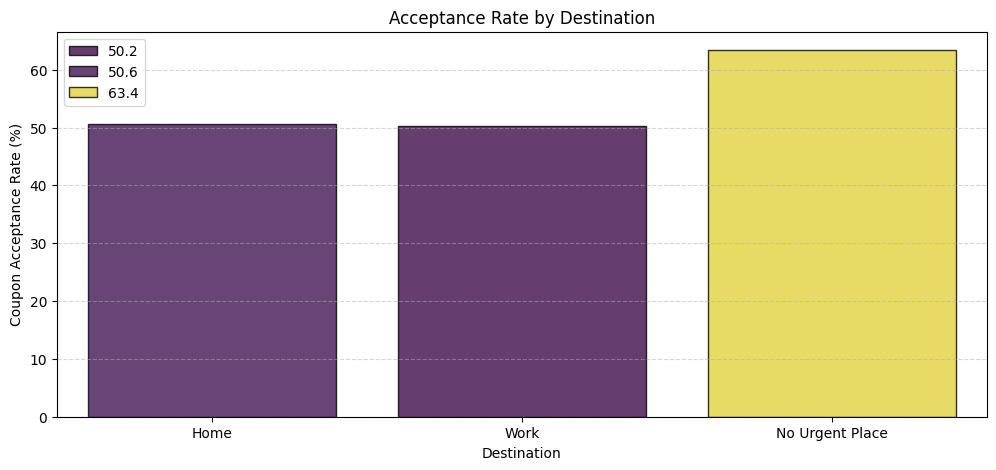

('Acceptance Rate for Home = 50.6%',
 'Acceptance Rate for Work = 50.2%',
 'Acceptance Rate for No Urgent Place = 63.4%')

In [65]:
# FINDINGS: Acceptance rate by destination
#   1.  The acceptance rate for NO URGENT PLACE is the highest among all the destinations: 63.4%

acceptance_rate_home = round(data.query('destination == "Home" and Y == 1').shape[0] / data.query('destination == "Home"').shape[0] * 100, 1)
acceptance_rate_work = round(data.query('destination == "Work" and Y == 1').shape[0] / data.query('destination == "Work"').shape[0] * 100, 1)
acceptance_rate_no_urgent = round(data.query('destination == "No Urgent Place" and Y == 1').shape[0] / data.query('destination == "No Urgent Place"').shape[0] * 100, 1)

# Plotting the Acceptance Rate by destination
plt.figure(figsize=(12, 5))
sns.barplot(x=["Home", "Work", "No Urgent Place"], y=[acceptance_rate_home, acceptance_rate_work, acceptance_rate_no_urgent], hue=[acceptance_rate_home, acceptance_rate_work, acceptance_rate_no_urgent], palette="viridis", alpha=0.8, edgecolor="black")
plt.title("Acceptance Rate by Destination")
plt.xlabel("Destination")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
"Acceptance Rate for Home = " + str(acceptance_rate_home) + "%", "Acceptance Rate for Work = " + str(acceptance_rate_work) + "%", "Acceptance Rate for No Urgent Place = " + str(acceptance_rate_no_urgent) + "%"

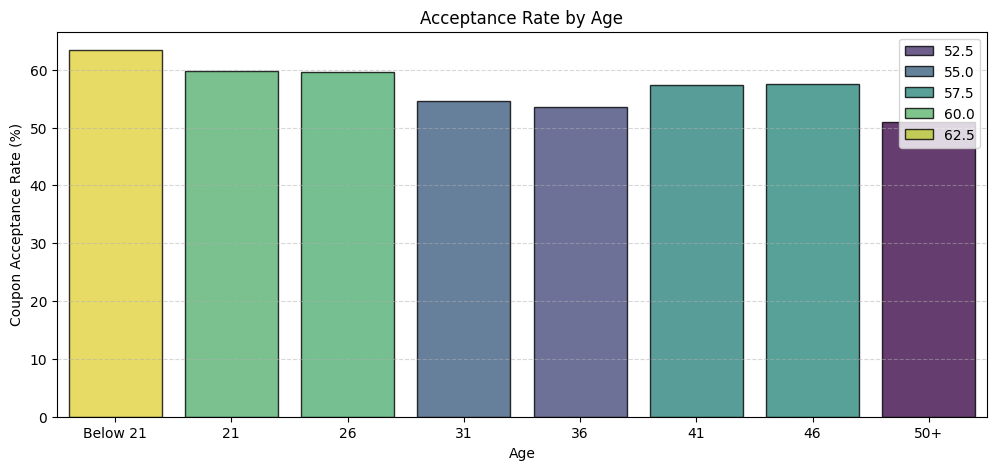

('Acceptance Rate for Below 21 = 63.4%',
 'Acceptance Rate for 21 = 59.8%',
 'Acceptance Rate for 26 = 59.6%',
 'Acceptance Rate for 31 = 54.6%',
 'Acceptance Rate for 36 = 53.5%',
 'Acceptance Rate for 41 = 57.3%',
 'Acceptance Rate for 46 = 57.6%',
 'Acceptance Rate for 50+ = 50.9%')

In [66]:
# FINDINGS: Coupon Acceptance Rate is highest below the age of 31 at 60%+ and Lowest in 50Plus age group

# calculating Acceptance Rate by Age
acceptance_rate_below21 = round(data.query('age == "below21" and Y == 1').shape[0] / data.query('age == "below21"').shape[0] * 100, 1)
acceptance_rate_21 = round(data.query('age == "21" and Y == 1').shape[0] / data.query('age == "21"').shape[0] * 100, 1)
acceptance_rate_26 = round(data.query('age == "26" and Y == 1').shape[0] / data.query('age == "26"').shape[0] * 100, 1)
acceptance_rate_31 = round(data.query('age == "31" and Y == 1').shape[0] / data.query('age == "31"').shape[0] * 100, 1)
acceptance_rate_36 = round(data.query('age == "36" and Y == 1').shape[0] / data.query('age == "36"').shape[0] * 100, 1)
acceptance_rate_41 = round(data.query('age == "41" and Y == 1').shape[0] / data.query('age == "41"').shape[0] * 100, 1)
acceptance_rate_46 = round(data.query('age == "46" and Y == 1').shape[0] / data.query('age == "46"').shape[0] * 100, 1)
acceptance_rate_50plus = round(data.query('age == "50plus" and Y == 1').shape[0] / data.query('age == "50plus"').shape[0] * 100, 1)

# Plotting the Acceptance Rate by Age
plt.figure(figsize=(12, 5))
sns.barplot(x=["Below 21", "21", "26", "31", "36", "41", "46", "50+"], y=[acceptance_rate_below21, acceptance_rate_21, acceptance_rate_26, acceptance_rate_31, acceptance_rate_36, acceptance_rate_41, acceptance_rate_46, acceptance_rate_50plus], hue=[acceptance_rate_below21, acceptance_rate_21, acceptance_rate_26, acceptance_rate_31, acceptance_rate_36, acceptance_rate_41, acceptance_rate_46, acceptance_rate_50plus], palette="viridis", alpha=0.8, edgecolor="black")
plt.title("Acceptance Rate by Age")
plt.xlabel("Age")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
"Acceptance Rate for Below 21 = " + str(acceptance_rate_below21) + "%", "Acceptance Rate for 21 = " + str(acceptance_rate_21) + "%", "Acceptance Rate for 26 = " + str(acceptance_rate_26) + "%", "Acceptance Rate for 31 = " + str(acceptance_rate_31) + "%", "Acceptance Rate for 36 = " + str(acceptance_rate_36) + "%", "Acceptance Rate for 41 = " + str(acceptance_rate_41) + "%", "Acceptance Rate for 46 = " + str(acceptance_rate_46) + "%", "Acceptance Rate for 50+ = " + str(acceptance_rate_50plus) + "%"

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [71]:
# Creating the Bar_data dataFrame containing only the Bar coupons ('coupons == "Bar"') and Bar column not null
bar_data = data.query('coupon == "Bar" and Bar.notnull()')
bar_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [72]:
# ANSWER: 41% of the bar coupons were accepted

proportion_bar_coupon_accepted = round(bar_data.query('Y == 1').shape[0] / bar_data.shape[0] * 100, 1)
"Proportion of Bar Coupons Accepted = " + str(proportion_bar_coupon_accepted) + "%"

'Proportion of Bar Coupons Accepted = 41.0%'

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


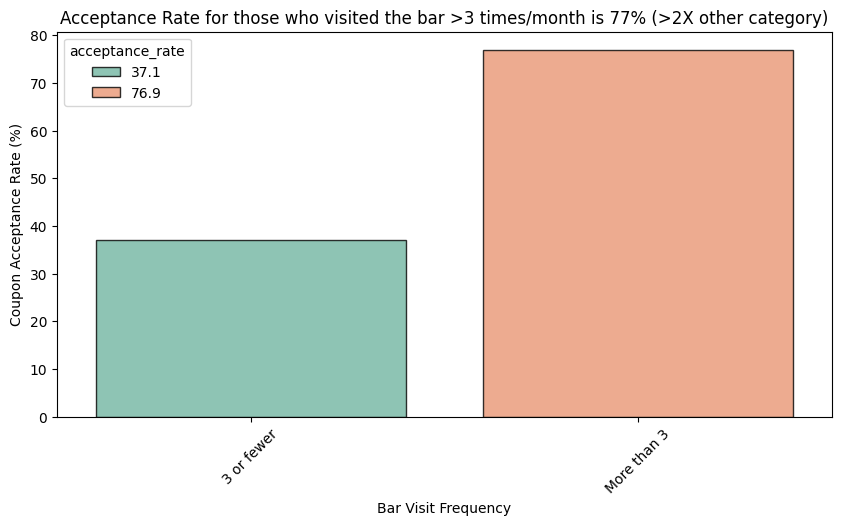

,Barfrequency,acceptance_rate
0,3 or fewer,37.1
1,More than 3,76.9


In [74]:
# ANSWER: Acceptance Rate for those who visited the bar 3 or fewer times is 37% and for those who visited the bar more than 3 times is 77%

# created a new column called Barfrequency to have only 2 bar frequencies: "3 or Fewer" and "More than 3"
bar_data.loc[bar_data["Bar"].isin(["never", "less1", "1~3"]), "Barfrequency"] = "3 or fewer"
bar_data.loc[bar_data["Bar"].isin(["4~8", "gt8"]), "Barfrequency"] = "More than 3"

acceptance_data = bar_data.groupby(["Barfrequency", "Y"])["Y"].value_counts().reset_index()

# picking up only the accepted coupons (Y = 1)
acceptance_rate_table = acceptance_data.query("Y == 1")

# Correctly calculate the total count for each Barfrequency
total_count = bar_data["Barfrequency"].value_counts().reset_index()
total_count.columns = ["Barfrequency", "total_count"]

# Merge the total count with the acceptance rate table
acceptance_rate_table = acceptance_rate_table.merge(total_count, on="Barfrequency", how="left")

# Calculate the acceptance rate
acceptance_rate_table["acceptance_rate"] = (acceptance_rate_table["count"] / acceptance_rate_table["total_count"] * 100).round(1)

# Select the relevant columns
acceptance_rate_table = acceptance_rate_table[["Barfrequency", "acceptance_rate"]]

plt.figure(figsize=(10, 5))
sns.barplot(acceptance_rate_table, x="Barfrequency", y="acceptance_rate", hue=acceptance_rate_table["acceptance_rate"].round(1), palette="Set2", alpha=0.8, edgecolor="black")
plt.title("Acceptance Rate for those who visited the bar >3 times/month is 77% (>2X other category)")
plt.xlabel("Bar Visit Frequency")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.xticks(rotation=45)
plt.show()
acceptance_rate_table


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


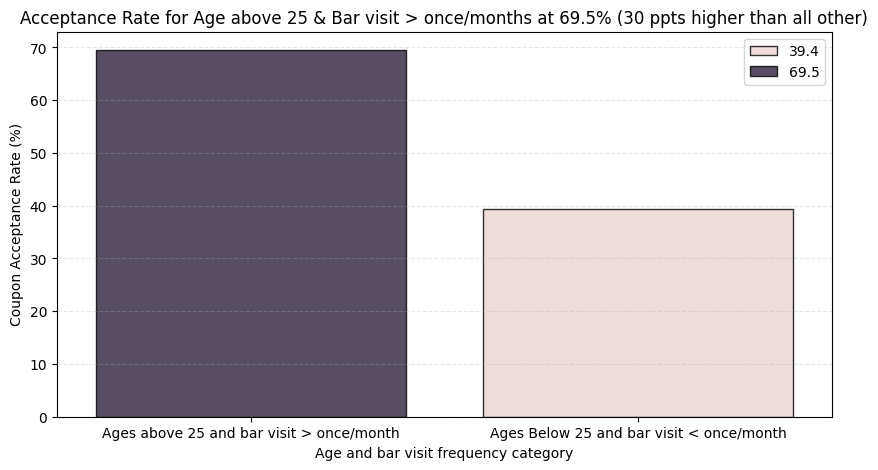

('Acceptance Rate for age above 25 and bar Visit more than once/month = 69.5%',
 'Acceptance Rate for age below 25 and bar Visit less than once/month = 39.4%',
 'Difference in Acceptance Rate = 30.1%')

In [75]:
### ANSWER: Acceptance Rate for Age above 25 & Bar visit > once/months at 69.5% (30 ppts higher compared to other category)

# create list of ages over 25 and bar visit more than once a month
list_of_ages_over25 = ["26", "31", "36", "41", "46", "50plus"]
list_of_barvisit_over1 = ["1~3", "4~8", "gt8"]

# create list of ages below 25 and visit bar less than once a month
list_of_ages_below25 = ["below21", "21"]
list_of_barvisit_below1 = ["less1", "never"]

# Create dataframe with list of ages over 25 and bar visit more than once a month
bar_data_age_over25_barvisit_over1 = bar_data.query('Bar in @list_of_barvisit_over1 and age in @list_of_ages_over25')

# Create dataframe with list of ages below 25 and bar visit less than once a month
bar_data_age_below25_barvisit_below1 = bar_data.query('Bar in @list_of_barvisit_below1 and age in @list_of_ages_below25')

# Acceptance rate for both the groups
acceptance_rate_over25 = round(bar_data_age_over25_barvisit_over1.query("Y == 1").shape[0] / bar_data_age_over25_barvisit_over1.shape[0] * 100, 1)
acceptance_rate_below25 = round(bar_data_age_below25_barvisit_below1.query("Y == 1").shape[0] / bar_data_age_below25_barvisit_below1.shape[0] * 100, 1)

difference = round(acceptance_rate_over25 - acceptance_rate_below25, 1)

# Plotting the acceptance rate for ages over 25 and bar visit more than once a month
plt.figure(figsize=(10, 5))
sns.barplot(x=["Ages above 25 and bar visit > once/month", "Ages Below 25 and bar visit < once/month"], y=[acceptance_rate_over25, acceptance_rate_below25], hue=[acceptance_rate_over25, acceptance_rate_below25], alpha=0.8, edgecolor="black")
plt.title("Acceptance Rate for Age above 25 & Bar visit > once/months at 69.5% (30 ppts higher than all other)")
plt.xlabel("Age and bar visit frequency category")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.show()

"Acceptance Rate for age above 25 and bar Visit more than once/month = " + str(acceptance_rate_over25) + "%", "Acceptance Rate for age below 25 and bar Visit less than once/month = " + str(acceptance_rate_below25) + "%", "Difference in Acceptance Rate = " + str(difference) + "%"

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


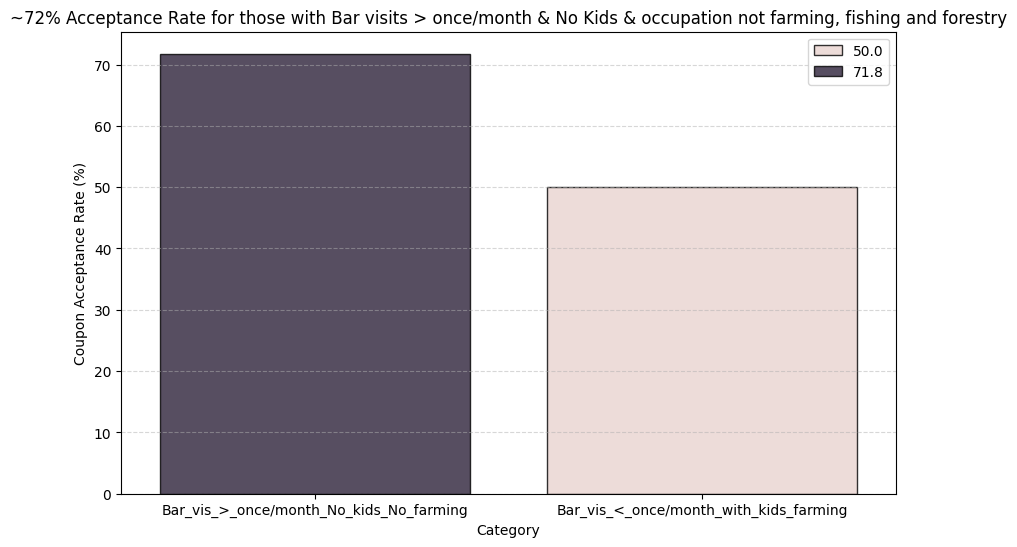

('Acceptance rate over 1 visit/month = 71.8%',
 'Acceptance rate less than 1 visit/month = 50.0%')

In [76]:
### ANSWER: Acceptance Rate for those who visited the bar > once/months and have No kids as passengers and occupation other than farming, fishing and forestry is 72% compared 
### to 50% for those who visited the bar < once/month and have kids as passengers or are alone and occupation as farming, fishing and forestry.

# Acceptance rate for drivers who visit bar more than once and no kids as passengers and occupation not farming, fishing and Forestry
bar_over1_no_kids_no_farming = bar_data.query('Bar == "1~3" or Bar == "4~8" or Bar == "gt8"').query('passanger == "Partner" or passanger == "Friend(s)"').query('occupation != "Farming Fishing & Forestry"')
acceptance_rate_over_1 = round(bar_over1_no_kids_no_farming.query("Y == 1").shape[0] / bar_over1_no_kids_no_farming.shape[0] * 100, 1)


# Acceptance rate for drivers who visit bar less than once and has kids as passengersor are Alone and occupation as farming, fishing nad forestry
bar_less1_kids_farming = bar_data.query('Bar == "never" or Bar == "less1"').query('passanger == "Kid(s)" or passanger == "Alone"').query('occupation == "Farming Fishing & Forestry"')
acceptance_rate_less_1 = round(bar_less1_kids_farming.query("Y == 1").shape[0] / bar_less1_kids_farming.shape[0] * 100, 1)

# Plotting the Bar chart for Acceptance Rates
plt.figure(figsize=(10, 6))
sns.barplot(x=["Bar_vis_>_once/month_No_kids_No_farming", "Bar_vis_<_once/month_with_kids_farming"], y=[acceptance_rate_over_1, acceptance_rate_less_1], hue=[acceptance_rate_over_1, acceptance_rate_less_1], alpha=0.8, edgecolor="black")
plt.title("~72% Acceptance Rate for those with Bar visits > once/month & No Kids & occupation not farming, fishing and forestry")
plt.xlabel("Category")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
"Acceptance rate over 1 visit/month = " + str(acceptance_rate_over_1) + "%", "Acceptance rate less than 1 visit/month = " + str(acceptance_rate_less_1) + "%"

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



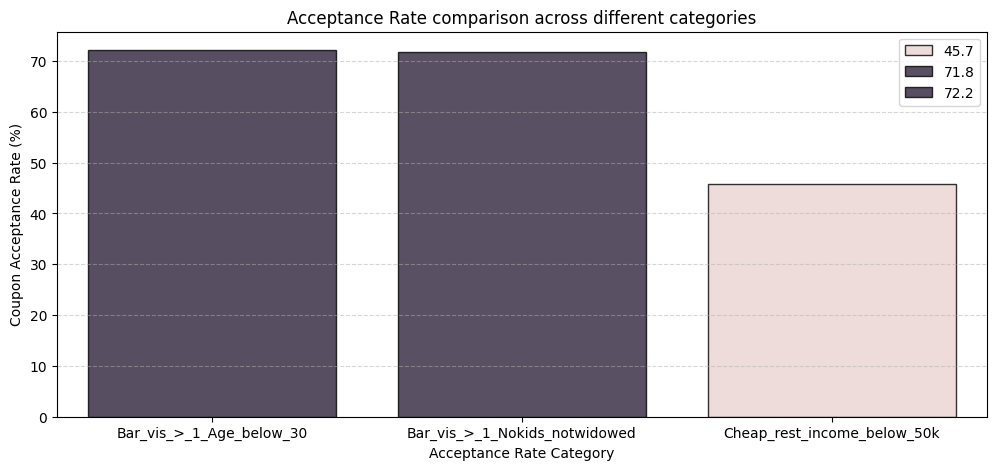

('Acceptance Rate with age below 30 = 72.2%',
 'Acceptance Rate Not Widowed = 71.8%',
 'Acceptance rate with Income below 50K and Cheap Restaurant = 45.7%')

In [77]:
### ANSWER: Acceptance Rate for those who visited the bar > once/months and had passengers that were not kids and were not widowed is 71.8% compared 
###         to 72.2% for those who visited the bar > once/month and are under the age of 30. 
###         45.7% Acceptance Rate For those who visited the cheap restaurants > 4 times/month and have income < 50K

# Acceptance rate for drivers who visit bar more than once/month and no kids as passengers and were not widowed
bar_over1_no_kids_not_widowed = bar_data.query('Bar == "1~3" or Bar == "4~8" or Bar == "gt8"').query('passanger == "Partner" or passanger == "Friend(s)"').query('maritalStatus != "Widowed"')
acceptance_rate_not_widowed = round(bar_over1_no_kids_not_widowed.query("Y == 1").shape[0] / bar_over1_no_kids_no_farming.shape[0] * 100, 1)

# Acceptance rate for drivers who visit bar more than once/month and are under the age os 30
bar_over1_age_below_30 = bar_data.query('Bar == "1~3" or Bar == "4~8" or Bar == "gt8"').query('age == "below21" or age == "21" or age == "26"')
acceptance_rate_age_below_30 = round(bar_over1_age_below_30.query("Y == 1").shape[0] / bar_over1_age_below_30.shape[0] * 100, 1)

# Acceptance rate for drivers who go to cheap restaurants more tha 4 times/month and Income < 50K
cheap_rest_income_below_50k = bar_data.query('RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8"').query('income == "Less than $12500" or income == "$12500 - $24999" or income == "$25000 - $37499" or income == "$37500 - $49999"')
acceptance_rate_cheap_rest_income_below_50k = round(cheap_rest_income_below_50k.query("Y == 1").shape[0] / cheap_rest_income_below_50k.shape[0] * 100, 1)

# Plotting the Bar chart for Acceptance Rates
plt.figure(figsize=(12, 5))
sns.barplot(x=["Bar_vis_>_1_Age_below_30", "Bar_vis_>_1_Nokids_notwidowed", "Cheap_rest_income_below_50k"], y=[acceptance_rate_age_below_30, acceptance_rate_not_widowed, acceptance_rate_cheap_rest_income_below_50k], hue=[acceptance_rate_age_below_30, acceptance_rate_not_widowed, acceptance_rate_cheap_rest_income_below_50k], alpha=0.8, edgecolor="black")
plt.title("Acceptance Rate comparison across different categories")
plt.xlabel("Acceptance Rate Category")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

"Acceptance Rate with age below 30 = " +str(acceptance_rate_age_below_30) + "%", "Acceptance Rate Not Widowed = " + str(acceptance_rate_not_widowed) + "%", "Acceptance rate with Income below 50K and Cheap Restaurant = " + str(acceptance_rate_cheap_rest_income_below_50k) + "%"


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [78]:
### ANSWER: Basis the context and dat analysis, 
###   Key hypothesis : Drivers who are most likely to accept the Bar coupons could have the following charateristics:
###         1. Frequent visitor (1-3, 4-8 and gt8) to the bar have higher Coupon acceptance rate
###         2. Age between 20 nad 26 should have the higher Coupon acceptance rate
###         3. Professions other than Farming, Fisheries and Forestry should have a higher Coupon acceptance rate
###         4. Drivers with Friends as passenger should have higer acceptance rate (as compared to those with kids as passengers)
###         5. Drivers are likely to have a higher acceptance rate at 55F (Pleasant weather) as compared to extremely hot or cold weather(30F or 80F)
###         6. Drivers with marital status as "Widowed" are likely to have a lower acceptance rate

###   Other Hypothesis: To be tested
###         1. Drivers who are single could have a higher Coupon acceptance Rate
###         2. Male Drivers are likely to have a higher Coupon acceptance Rate
###         3. Driving in the Same Direction may have a higher Acceptance Rate
###         4. 6PM to 10PM Times may have a higher Bar Coupon Acceptance Rate


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [79]:
# Acceptance rate by marital status
acceptance_rate_married = round(data.query('maritalStatus == "Married partner" and Y == 1').shape[0] / data.query('maritalStatus == "Married partner"').shape[0] * 100, 1)
acceptance_rate_single = round(data.query('maritalStatus == "Single" and Y == 1').shape[0] / data.query('maritalStatus == "Single"').shape[0] * 100, 1)
acceptance_rate_widowed = round(data.query('maritalStatus == "Widowed" and Y == 1').shape[0] / data.query('maritalStatus == "Widowed"').shape[0] * 100, 1)
acceptance_rate_divorced = round(data.query('maritalStatus == "Divorced" and Y == 1').shape[0] / data.query('maritalStatus == "Divorced"').shape[0] * 100, 1)
acceptance_rate_unmarried = round(data.query('maritalStatus == "Unmarried partner" and Y == 1').shape[0] / data.query('maritalStatus == "Unmarried partner"').shape[0] * 100, 1)

acceptance_rate_married, acceptance_rate_single, acceptance_rate_widowed, acceptance_rate_divorced, acceptance_rate_unmarried

(54.3, 60.6, 47.7, 52.9, 56.1)

In [80]:
# Acceptance rate by "age"
acceptance_rate_below21 = round(data.query('age == "below21" and Y == 1').shape[0] / data.query('age == "below21"').shape[0] * 100, 1)
acceptance_rate_21 = round(data.query('age == "21" and Y == 1').shape[0] / data.query('age == "21"').shape[0] * 100, 1)
acceptance_rate_26 = round(data.query('age == "26" and Y == 1').shape[0] / data.query('age == "26"').shape[0] * 100, 1)
acceptance_rate_31 = round(data.query('age == "31" and Y == 1').shape[0] / data.query('age == "31"').shape[0] * 100, 1)
acceptance_rate_36 = round(data.query('age == "36" and Y == 1').shape[0] / data.query('age == "36"').shape[0] * 100, 1)
acceptance_rate_41 = round(data.query('age == "41" and Y == 1').shape[0] / data.query('age == "41"').shape[0] * 100, 1)
acceptance_rate_46 = round(data.query('age == "46" and Y == 1').shape[0] / data.query('age == "46"').shape[0] * 100, 1)
acceptance_rate_50plus = round(data.query('age == "50plus" and Y == 1').shape[0] / data.query('age == "50plus"').shape[0] * 100, 1)
acceptance_rate_below21, acceptance_rate_21, acceptance_rate_26, acceptance_rate_31, acceptance_rate_36, acceptance_rate_41, acceptance_rate_46, acceptance_rate_50plus


(63.4, 59.8, 59.6, 54.6, 53.5, 57.3, 57.6, 50.9)

In [81]:
# calculate acceptance rate bt time
acceptance_rate_7am = round(data.query('time == "7AM" and Y == 1').shape[0] / data.query('time == "7AM"').shape[0] * 100, 1)
acceptance_rate_10am = round(data.query('time == "10AM" and Y == 1').shape[0] / data.query('time == "10AM"').shape[0] * 100, 1)
acceptance_rate_2pm = round(data.query('time == "2PM" and Y == 1').shape[0] / data.query('time == "2PM"').shape[0] * 100, 1)
acceptance_rate_6pm = round(data.query('time == "6PM" and Y == 1').shape[0] / data.query('time == "6PM"').shape[0] * 100, 1)
acceptance_rate_10pm = round(data.query('time == "10PM" and Y == 1').shape[0] / data.query('time == "10PM"').shape[0] * 100, 1)
acceptance_rate_7am, acceptance_rate_10am, acceptance_rate_2pm, acceptance_rate_6pm, acceptance_rate_10pm


(50.2, 60.8, 66.2, 58.5, 50.8)

In [97]:
bar_data.groupby(["expiration", "Y"])["Y"].value_counts()

expiration  Y
1d          0    904
            1    635
2h          0    273
            1    184
Name: count, dtype: int64